# Aim
Decision Tree : example you want to predict weathre to read a random book or not so your fried starts aking you questions beging with most informative question then the 2nd informative etc.. so it will lead in th end based on the question weather to read or not (final decision).


Random Forests : it is a collection of many decision trees where it chooses the classification based on the most voted class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


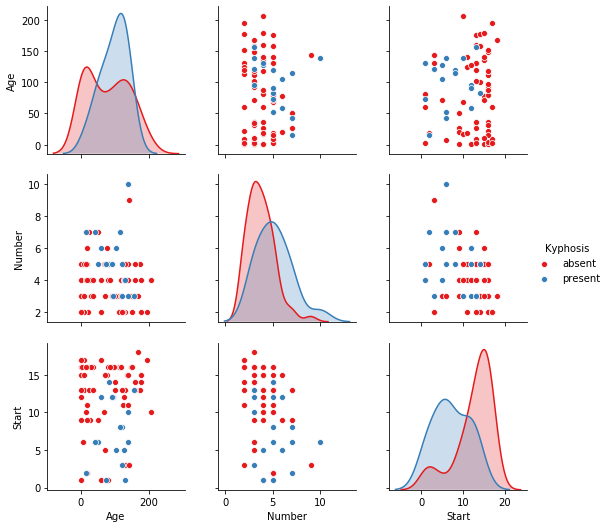

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# Predicting and Evaluating 

In [11]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.95      0.90      0.93        21
     present       0.60      0.75      0.67         4

    accuracy                           0.88        25
   macro avg       0.77      0.83      0.80        25
weighted avg       0.89      0.88      0.89        25



In [15]:
print(confusion_matrix(y_test,predictions))

[[19  2]
 [ 1  3]]


# Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rfc_pred = rfc.predict(X_test)

In [22]:
# Evaluating 
print(confusion_matrix(y_test,rfc_pred))

[[21  0]
 [ 2  2]]


In [23]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.91      1.00      0.95        21
     present       1.00      0.50      0.67         4

    accuracy                           0.92        25
   macro avg       0.96      0.75      0.81        25
weighted avg       0.93      0.92      0.91        25

